In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#tips 데이터셋 로드

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른 (그룹화)팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [8]:
# 컬럼 이름 변경
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
# 반올림
# tips[['총금액','팁']] = tips[['총금액', '팁']].round(1)  -> 한번에 여러컬럼 함수적용 가능 
tips['총금액'] = tips['총금액'].round(1)
tips['팁'] = tips['팁'].round(1)
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3
240,27.2,2.0,Female,Yes,Sat,Dinner,2
241,22.7,2.0,Male,Yes,Sat,Dinner,2
242,17.8,1.8,Male,No,Sat,Dinner,2


In [38]:
# 팁의 비율 New 컬럼 
# 금액대비 팁의 비율

tips['금액대비 팁(%)'] = tips['팁'] / tips['총금액'] *100
tips['금액대비 팁(%)'] = tips['금액대비 팁(%)'].round(2)
tips

,총금액,팁,성별,흡연여부,요일,시간,인원,금액대비 팁,금액대비 팁(%)
0,17.0,1.0,Female,No,Sun,Dinner,2,5.88,5.88
1,10.3,1.7,Male,No,Sun,Dinner,3,16.50,16.50
2,21.0,3.5,Male,No,Sun,Dinner,3,16.67,16.67
3,23.7,3.3,Male,No,Sun,Dinner,2,13.92,13.92
4,24.6,3.6,Female,No,Sun,Dinner,4,14.63,14.63
...,...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.34,20.34
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.35,7.35
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.81,8.81
242,17.8,1.8,Male,No,Sat,Dinner,2,10.11,10.11


In [39]:
# 그룹화
_df = tips[['성별', '인원', '금액대비 팁(%)']].groupby(['인원', '성별']).mean()
_df

금액대비 팁(%)
인원 성별               
1  Male    22.090000
   Female  21.323333
2  Male    16.273367
   Female  17.053103
3  Male    14.762917
   Female  16.025000
4  Male    15.017143
   Female  13.265556
5  Male    13.372500
   Female  17.110000
6  Male    14.950000
   Female  16.305000

In [32]:
# 시각화 위한 사전작업 & 한글 깨짐 방지(window용)

import platform
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='인원,성별'>

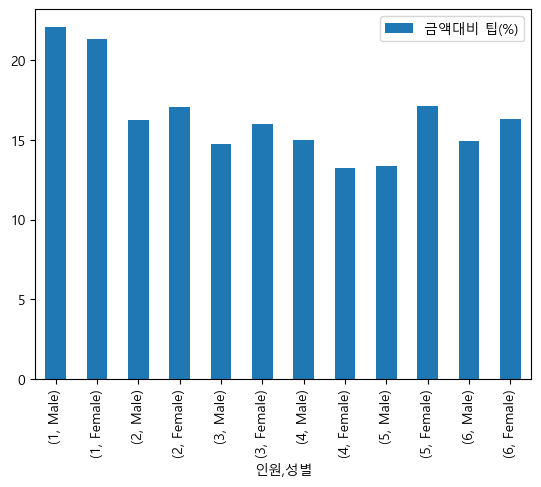

In [40]:
_df.plot.bar()

In [41]:
_df.index  # MultiIndex 나옴

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

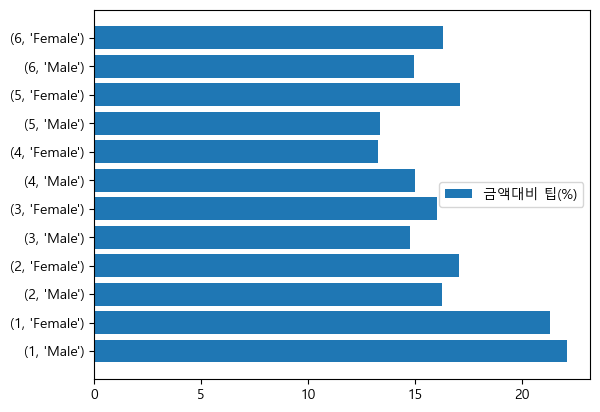

In [47]:
x = list(range(0, len(_df.index), 1))
y = _df['금액대비 팁(%)']

plt.barh(x, y, label = '금액대비 팁(%)')
plt.yticks(x, _df.index)
plt.legend()
plt.show()

In [83]:
_df.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [56]:
# 남자 데이터프레임
# 여자 데이터프레임 나누고 싶어요. 어떻게 하면 좋을까? 생각을 해보자 ... 시라나이 ! 

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in _df.index : 
    # print(i[1])

    if i[1] == 'Male' :
        male_data = pd.concat([male_data, _df.loc[[i]]])
    else : 
        female_data = pd.concat([female_data, _df.loc[[i]]])

    

In [57]:
male_data

,,금액대비 팁(%)
인원,성별,
1,Male,22.090000
2,Male,16.273367
3,Male,14.762917
4,Male,15.017143
5,Male,13.372500
6,Male,14.950000


In [62]:
# _df.loc[(1, 'Female')] -> 시리즈 형태로 나옴
_df.loc[[(1, 'Female')]] # -> dataframe 형태로 나옴 

# df[x] <- 대괄호 하나면 x 인덱스의 values 값들과 각 컬럼들과 함께 '시리즈' 형태
# df[[x]] <- [x] 리스트 x 는 리스트이기에 여러 원소를 포함할 수 있기에, df[[x]]를 시리즈 형태가 불가능해 'df 형태'로 나온단다 헤헤

,,금액대비 팁(%)
인원,성별,
1,Female,21.323333


In [64]:
male_data #->  그래프 만들려는 아래 형태 보니 인원만 필요한데 이건 '길이(len)' 였네 

,,금액대비 팁(%)
인원,성별,
1,Male,22.090000
2,Male,16.273367
3,Male,14.762917
4,Male,15.017143
5,Male,13.372500
6,Male,14.950000


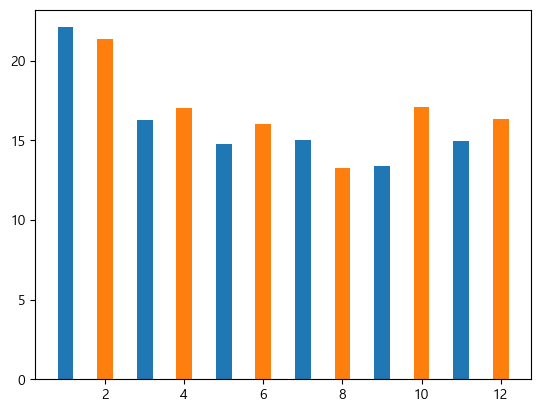

In [70]:
x = list(range(1, len(male_data)*2, 2))
y = male_data['금액대비 팁(%)']

x2 = list(range(2, (len(female_data)+1)*2, 2))
y2 = female_data['금액대비 팁(%)']

plt.bar(x, y, width = 0.4)
plt.bar(x2, y2, width = 0.4)  # 이렇게 쓰면 그래프 겹쳐짐 x의 값들이 둘이 같아서 그래 
                    # 쪼개기 위해서, width 값 0.4 로설정 후, x의 시작점들을 다르게 해줘


plt.show()



In [71]:
# 위에 귀찮잖아 Pivot 사용하자 !!


### pivot_table

1. 그룹화
2. 인덱스, 컬럼을 기준으로 나눈다. 
3. 데이터 집계를 나타낸다.

In [74]:
pivot_data =  pd.pivot_table(
    tips,
    index = '인원',
    columns= '성별',
    values = ['금액대비 팁(%)'],
    aggfunc= 'mean'
)

pivot_data

금액대비 팁(%)           
성별       Male     Female
인원                      
1   22.090000  21.323333
2   16.273367  17.053103
3   14.762917  16.025000
4   15.017143  13.265556
5   13.372500  17.110000
6   14.950000  16.305000

<Axes: xlabel='인원'>

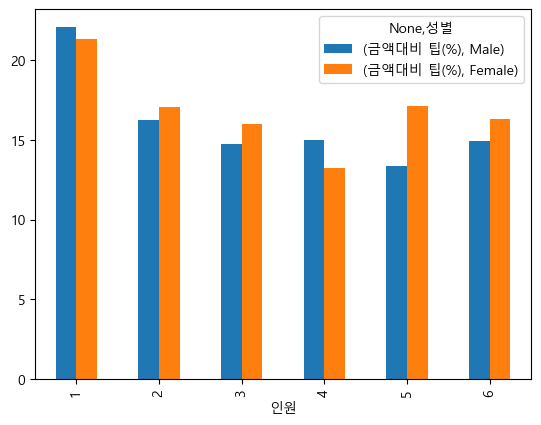

In [75]:
pivot_data.plot.bar()